In [1]:
!pip list     # ver qué librerías hay instaladas en la virtual machine de Colab


Package                           Version
--------------------------------- ------------------
aext-assistant                    4.20.0
aext-assistant-server             4.20.0
aext-core                         4.20.0
aext-core-server                  4.20.0
aext_environments_server          4.20.0
aext-panels                       4.20.0
aext-panels-server                4.20.0
aext-project-filebrowser-server   4.20.0
aext-share-notebook               4.20.0
aext-share-notebook-server        4.20.0
aext-shared                       4.20.0
aext-toolbox                      4.20.0
affine                            2.4.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-

In [2]:
!pip install pydataset
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader
#!pip install yfinance

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime as dt
from pydataset import data
import statsmodels as sm
import statsmodels.api as sm_api
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 5.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=eec7ce0240991db8e1da56c07ea8ab040877bc5c1bd3838bacf322473a2f9e74
  Stored in directory: /Users/abc/Library/Caches/pip/wheels/4c/82/ad/f04abc617222b10438b1285ab9b5cfaecd180c10a7c81cff54
Successfully built pydataset


ModuleNotFoundError: No module named 'pandas_datareader'

# Bitcoin

In [ ]:
start = dt.datetime(2007, 1, 1)        # fecha inicial: 1 enero 2007
end   = dt.datetime(2024, 10, 1)       # fecha final: 1 octubre 2024

# cargar datos en 'bit'
bit = yf.download('BTC-USD', start=start, end=end)   # descarga datos históricos de Bitcoin en USD con yfinance
bit                                            # muestra el DataFrame con precios OHLCV (Open, High, Low, Close, Volume, Adj Close)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-09-26,63138.546875,65790.796875,62669.269531,65181.019531,65181.019531,36873129847
2024-09-27,65180.664062,66480.695312,64852.992188,65790.664062,65790.664062,32058813449
2024-09-28,65792.179688,66255.531250,65458.035156,65887.648438,65887.648438,15243637984


In [ ]:
type(bit)

pandas.core.frame.DataFrame

In [ ]:
bit.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22',
               '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
               ...
               '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26',
               '2024-09-27', '2024-09-28', '2024-09-29', '2024-09-30'],
              dtype='datetime64[ns]', name='Date', length=3667, freq=None)

In [ ]:
# ver si hay valores ausentes
print(bit.loc[bit['Volume'].isnull()]==True)

# no hay faltantes

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


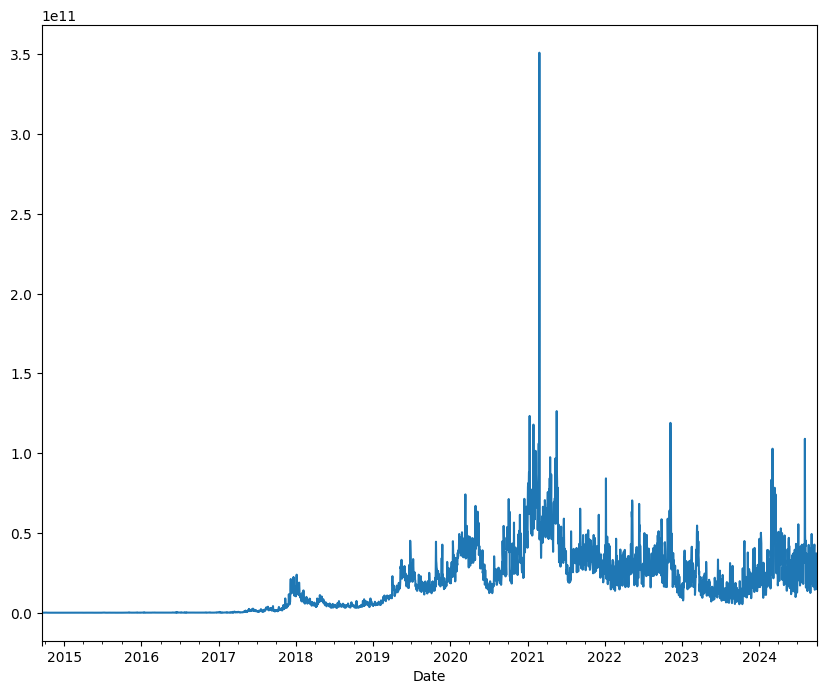

In [ ]:
# ver data
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.squeeze.html

serie = bit['Volume'].squeeze()          # extrae la columna 'Volume' y la convierte en Serie

plot = serie.plot(figsize=(10, 8))       # grafica el volumen de BTC con tamaño 10x8
plt.show()                               # muestra el gráfico en pantalla

In [ ]:
serie

,Volume
Date,
2014-09-17,21056800
2014-09-18,34483200
2014-09-19,37919700
2014-09-20,36863600
2014-09-21,26580100
...,...
2024-09-26,36873129847
2024-09-27,32058813449
2024-09-28,15243637984


# Estacionareidad

# Test de Dickey-Fuller (ADF)

El **test Dickey-Fuller aumentado (ADF)** sirve para verificar si una serie temporal es **estacionaria** o no.

---

## Hipótesis del test
- **H0 (Hipótesis nula):** La serie tiene raíz unitaria → **NO es estacionaria**.  
- **H1 (Hipótesis alternativa):** La serie NO tiene raíz unitaria → **Es estacionaria**.  

---

## Interpretación con el p-value
- **p-value > 0.05** → No se rechaza H0 → La serie **no es estacionaria**.  
- **p-value ≤ 0.05** → Se rechaza H0 → La serie **es estacionaria**.  

---

## Ejemplo de salida
- **ADF Statistic:** valor del estadístico (más negativo → más evidencia de estacionariedad).  
- **p-value:** se compara con 0.05 o 0.01.  
- **Critical Values:** valores de referencia para 1%, 5% y 10%.  

---
📌 En resumen:  
Si el **p-value** es bajo (≤ 0.05), la serie es **estacionaria**.  
Si es alto (> 0.05), la serie **no es estacionaria**.


In [ ]:
X = serie.values  
# Extrae los valores de la serie temporal (sin índices, solo los datos numéricos) 
# y los guarda en un array de NumPy.

result = adfuller(X)  
# Ejecuta el test de Dickey-Fuller aumentado (ADF) sobre la serie X. 
# Devuelve una tupla con varios resultados: estadístico ADF, p-value, número de lags usados, etc.

print('ADF Statistic: %f' % result[0])  
# Muestra en pantalla el valor del estadístico ADF (primer elemento de la tupla).
# Cuanto más negativo es este valor, más evidencia de estacionariedad hay.

print('p-value: %f' % result[1])  
# Muestra el p-value de la prueba (segundo elemento de la tupla).
# Este valor se usa para decidir si se rechaza la hipótesis nula.

print('Critical Values:')  
# Imprime un título para mostrar los valores críticos del test.

for key, value in result[4].items():  
    print('\t%s: %.3f' % (key, value))  
# Itera sobre los valores críticos para distintos niveles de significancia (1%, 5%, 10%).
# Muestra cada clave (nivel) y su valor crítico.

print('*******')  
# Separador visual en la salida.

ADF Statistic: -2.427365
p-value: 0.134161
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


(-2.4273651372824854,
 0.13416127484468354,
 29,
 3637,
 {'1%': -3.432149263499404,
  '5%': -2.8623350143451307,
  '10%': -2.5671931983337477},
 176258.98023204773)

# Cuanto más negativo sea este estadístico, más probable es que rechacemos la hipótesis nula (tenemos un conjunto de datos estacionario).
# Para este caso, el estadístico de la serie es mayor que los valores críticos, entonces debemos aceptar la H0 -> la serie es NO ESTACIONARIA

# Tendencia y Ciclo

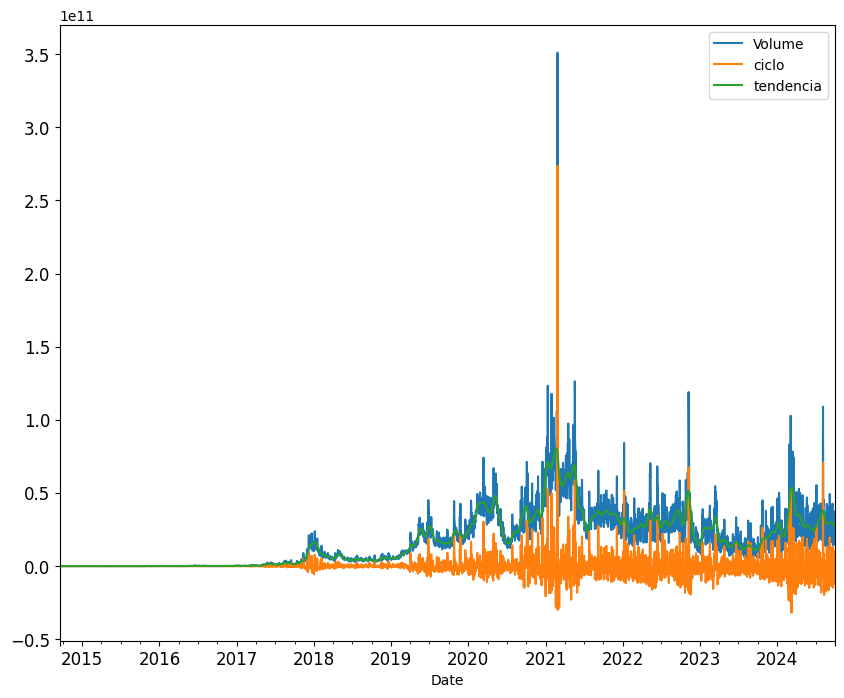

In [ ]:
# filtro de Hodrick-Prescott para separar tendencia y componente
# https://www.statsmodels.org/dev/tsa.html

ciclo, tendencia = sm_api.tsa.filters.hpfilter(serie)  
# Aplica el filtro de Hodrick-Prescott (HP) a la serie.
# Devuelve dos series: 
#  - 'ciclo': las fluctuaciones de corto plazo (componente cíclico).
#  - 'tendencia': el movimiento de largo plazo (tendencia suavizada).

bit['ciclo'] = ciclo  
# Agrega la columna 'ciclo' al DataFrame 'bit' con los valores del componente cíclico.

bit['tendencia'] = tendencia   # media móvil anual  
# Agrega la columna 'tendencia' al DataFrame 'bit' con los valores de la tendencia.

bit[['Volume', 'ciclo', 'tendencia']].plot(figsize=(10,8), fontsize=12)  
# Grafica en la misma figura las tres series: 
# - 'Volume' (serie original), 
# - 'ciclo', 
# - 'tendencia'. 
# El tamaño del gráfico es 10x8 pulgadas, con fuentes de tamaño 12.

legend = plt.legend()  
# Obtiene la leyenda del gráfico.

legend.prop.set_size(14)  
# Ajusta el tamaño de la fuente de la leyenda a 14.

plt.show()  
# Muestra el gráfico final en pantalla.


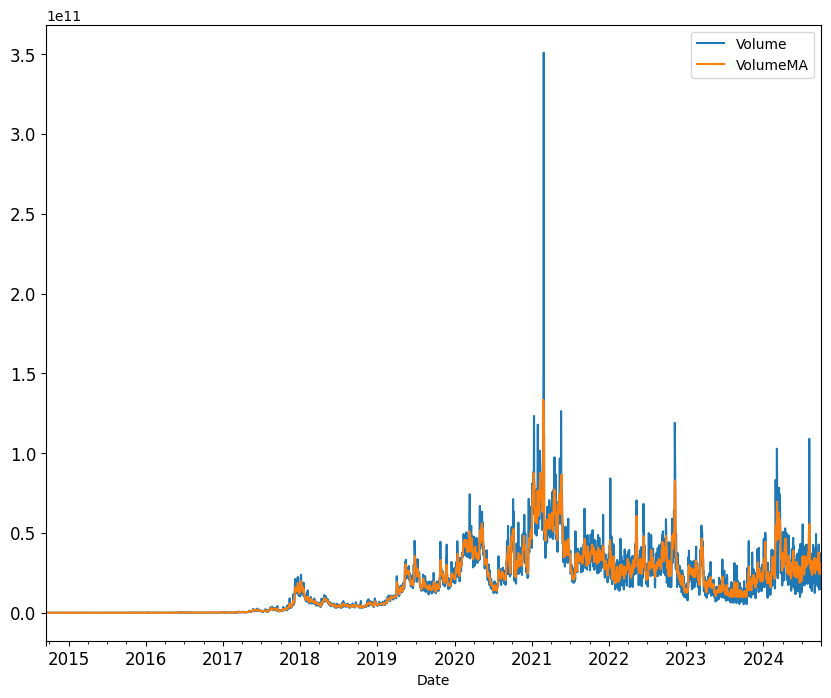

In [ ]:
VolumeMA = serie.rolling(window=5, center=True).mean()  
# Calcula la media móvil de la serie con una ventana de 5 días.
# - window=5 → tamaño de la ventana (se promedian 5 valores).
# - center=True → la ventana se centra en cada observación (no se desplaza solo hacia atrás).
# El resultado es una serie suavizada que elimina ruido de corto plazo.

bit['VolumeMA'] = VolumeMA  
# Agrega la serie calculada (media móvil) como una nueva columna 'VolumeMA' en el DataFrame 'bit'.

plot = bit[['Volume', 'VolumeMA']].plot(figsize=(10,8), fontsize=12)  
# Grafica la serie original ('Volume') y la media móvil ('VolumeMA') juntas.
# figsize=(10,8) → define el tamaño del gráfico en pulgadas.
# fontsize=12 → tamaño de fuente para etiquetas y ticks.

plt.show()  
# Muestra el gráfico en pantalla.

# Descomposición


La **descomposición estacional** divide una serie en tres componentes principales:

- **Tendencia (Trend):** cambios de largo plazo.  
- **Estacionalidad (Seasonal):** patrones que se repiten en el tiempo (ej. estacionalidad mensual o anual).  
- **Residuo (Residual):** ruido aleatorio o parte no explicada.  

---

## Tipos de modelos
- **Aditivo:** serie = tendencia + estacionalidad + residuo  
  → se usa cuando la magnitud de la estacionalidad es constante.  

- **Multiplicativo:** serie = tendencia × estacionalidad × residuo  
  → se usa cuando la estacionalidad varía en proporción a la tendencia.  

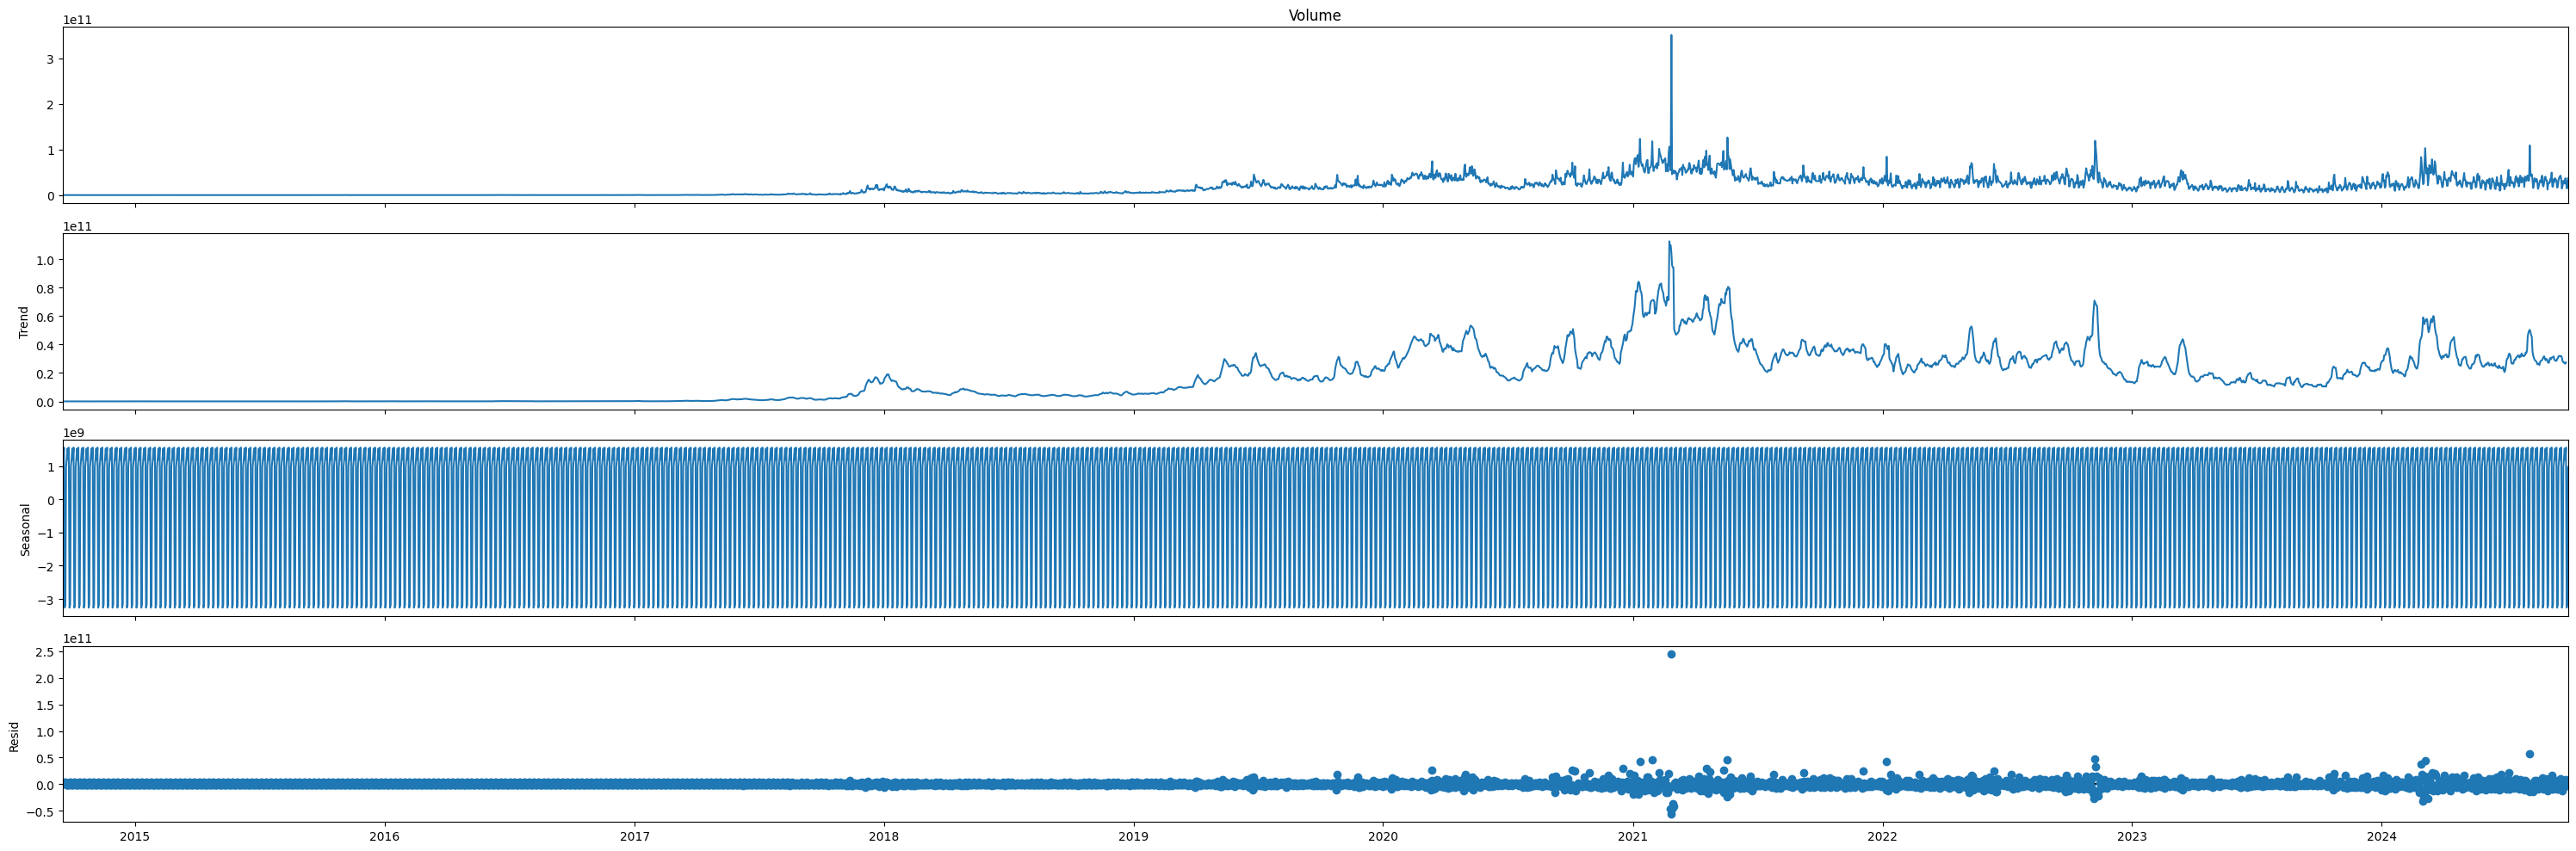

In [ ]:
descomposicion = sm_api.tsa.seasonal_decompose(serie, model='additive')  
# Aplica la descomposición estacional a la serie temporal.
# 'model="additive"' → asume que:
#    serie = tendencia + estacionalidad + residuo
# Devuelve un objeto con los tres componentes (trend, seasonal, resid).

plt.rcParams['figure.figsize'] = [30, 10]  
# Ajusta el tamaño por defecto de los gráficos a 30x10 pulgadas.
# Esto genera gráficos grandes y fáciles de leer.

fig = descomposicion.plot()  
# Crea un gráfico con la descomposición:
# - Observed: la serie original
# - Trend: la tendencia de largo plazo
# - Seasonal: el patrón estacional repetitivo
# - Residual: la parte no explicada (ruido)

plt.show()  
# Muestra el gráfico en pantalla.


# Modelo ARIMA en series temporales

ARIMA significa:
- **AR (p):** parte autorregresiva → relación con valores pasados.  
- **I (d):** integración → número de diferenciaciones necesarias para estacionar la serie.  
- **MA (q):** medias móviles → relación con errores pasados.  

---

In [ ]:
# pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

serie=serie.asfreq('D')    # cambiamos a frecuencia diaria
serie

,Volume
Date,
2014-09-17,21056800
2014-09-18,34483200
2014-09-19,37919700
2014-09-20,36863600
2014-09-21,26580100
...,...
2024-09-26,36873129847
2024-09-27,32058813449
2024-09-28,15243637984


In [ ]:
serie.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22',
               '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
               ...
               '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26',
               '2024-09-27', '2024-09-28', '2024-09-29', '2024-09-30'],
              dtype='datetime64[ns]', name='Date', length=3667, freq='D')

In [ ]:
# separo hasta el 31-12-2022 y el mes de enero de 2023
serie1=serie[:'2022']
serie2=serie['2023':]
serie2

,Volume
Date,
2023-01-01,9244361700
2023-01-02,12097775227
2023-01-03,13903079207
2023-01-04,18421743322
2023-01-05,13692758566
...,...
2024-09-26,36873129847
2024-09-27,32058813449
2024-09-28,15243637984


In [ ]:
# invocar modelo ARIMA, entrenar y mostrar resultados para 'serie1'
# doc: https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html

modelo = sm.tsa.arima.model.ARIMA(serie1.iloc[1:], order=(1,0,0))  # crea modelo ARIMA(1,0,0) sobre serie1 (desde la 2ª fila)
resultados = modelo.fit()                                          # ajusta (entrena) el modelo con los datos
print(resultados.summary())                                        # imprime resumen: coeficientes, AIC, BIC, p-values, etc.


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 3027
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -73906.733
Date:                Fri, 04 Oct 2024   AIC                         147819.466
Time:                        00:48:15   BIC                         147837.512
Sample:                    09-18-2014   HQIC                        147825.954
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.635e+10   5.01e-16   3.26e+25      0.000    1.63e+10    1.63e+10
ar.L1          0.8736      0.001    831.413      0.000       0.872       0.876
sigma2      9.434e+19   3.44e-24   2.74e+43      0.0

In [ ]:
pronostico = resultados.fittedvalues  
# Extrae los valores ajustados por el modelo ARIMA.
# Representan lo que el modelo predice para los mismos puntos de la serie observada (in-sample prediction).

pronostico.name = 'pronostico'  
# Le da el nombre "pronostico" a la serie de fitted values, para que al juntarla en un DataFrame quede más legible.

serief = serie1.iloc[1:]  
# Toma la serie original desde la segunda observación (porque al entrenar usamos .iloc[1:]).
# Así se alinean los índices con los fitted values.

df = pd.concat([serief, pronostico], axis=1)  
# Une la serie real y los valores pronosticados en un mismo DataFrame, por columnas (axis=1).
# El resultado es un DataFrame con dos columnas: la serie observada y el pronóstico.

df  
# Muestra el DataFrame resultante en pantalla.


,Volume,pronostico
Date,,
2014-09-18,34483200,1.634923e+10
2014-09-19,37919700,2.096171e+09
2014-09-20,36863600,2.099173e+09
2014-09-21,26580100,2.098251e+09
2014-09-22,24127600,2.089267e+09
...,...,...
2022-12-27,15748580239,1.245085e+10
2022-12-28,17005713920,1.582448e+10
2022-12-29,14472237479,1.692275e+10


In [ ]:
serie1.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22',
               '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=3028, freq='D')

In [ ]:
pronostico.index

DatetimeIndex(['2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22', '2014-09-23',
               '2014-09-24', '2014-09-25', '2014-09-26', '2014-09-27',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=3027, freq='D')

In [ ]:
pronostico

,pronostico
Date,
2014-09-18,1.634923e+10
2014-09-19,2.096171e+09
2014-09-20,2.099173e+09
2014-09-21,2.098251e+09
2014-09-22,2.089267e+09
...,...
2022-12-27,1.245085e+10
2022-12-28,1.582448e+10
2022-12-29,1.692275e+10


In [ ]:
type(resultados)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

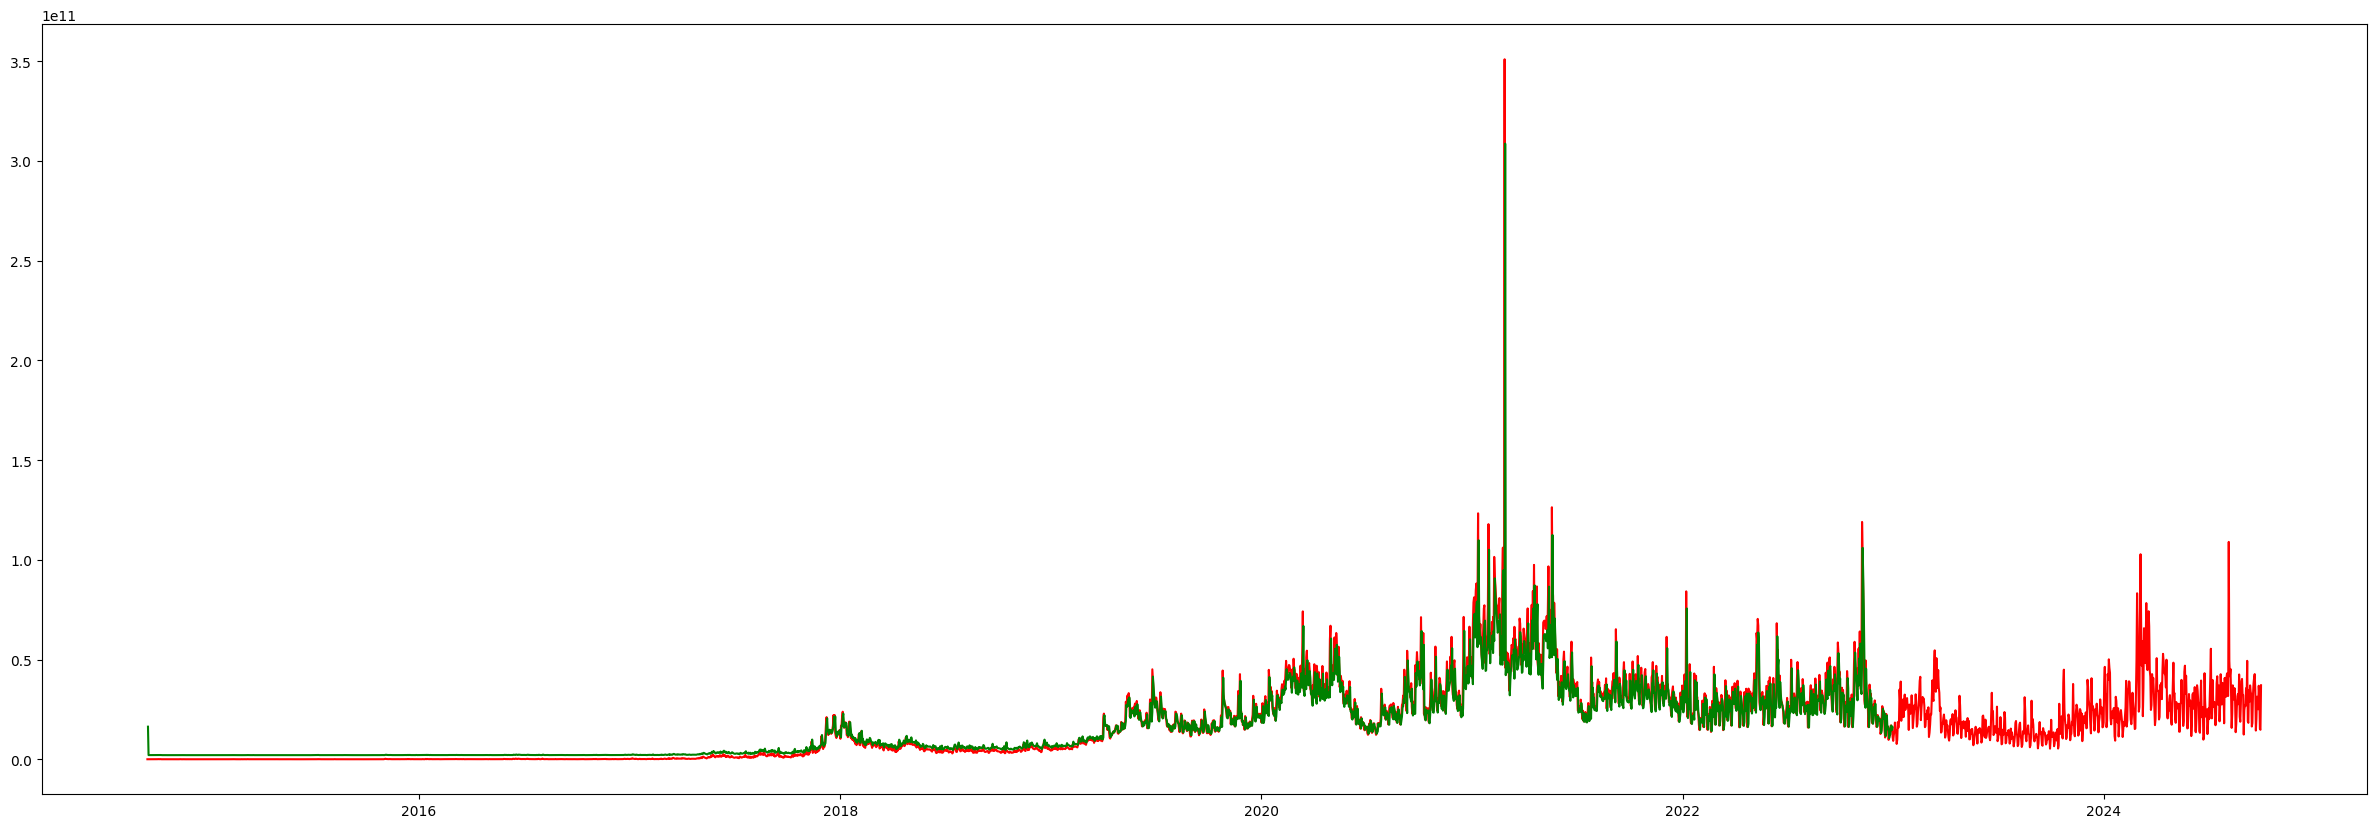

In [ ]:
df = bit[['Volume']].copy()          # mantiene 'Volume' como DataFrame
df['pronostico'] = pronostico        # agrega la columna con el forecast

plt.plot(df['Volume'], c='r', label='Real')            # serie original
plt.plot(resultados.fittedvalues, c='g', label='Ajuste')  # valores ajustados ARIMA
plt.legend()
plt.show()

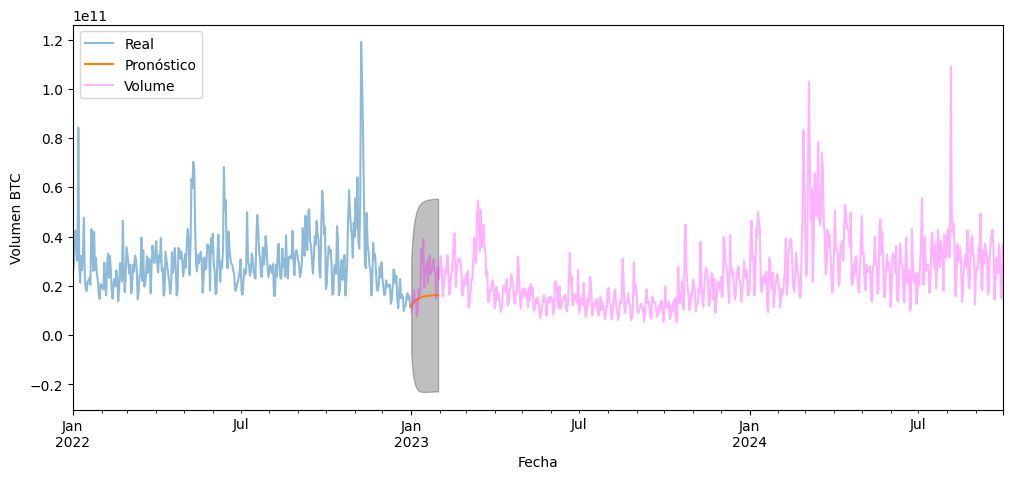

In [ ]:
# ahora hagamos un pronóstico (forecast)

pred_f = resultados.get_forecast(steps=30)        # pronóstico 30 pasos hacia adelante
pred_ci = pred_f.conf_int()                       # intervalos de confianza (inferior/superior)

ax = serie1['2022'].plot(label='Real', figsize=(12, 5), alpha=0.5)  # grafica serie real desde 2022
pred_f.predicted_mean.plot(ax=ax, label='Pronóstico')               # curva del forecast
serie2.plot(color='magenta', alpha=0.3)                             # serie comparativa (ej. datos reales de validación)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                color='k', alpha=.25)           # banda sombreada de incertidumbre

ax.set_xlabel('Fecha')                           # etiqueta eje X
ax.set_ylabel('Volumen BTC')                     # etiqueta eje Y
plt.legend()                                     # leyenda
plt.show()                                       # muestra el gráfico


In [ ]:
# guardar datos de bitcoin en archivo csv para persistencia,
# después hay que descargarlos a la PC

symbols = ['BTC-USD']                                # lista de símbolos (aquí solo Bitcoin)
for i in symbols:
    data = yf.download(i, '2017-01-01', '2023-01-31')  # descarga precios históricos (OHLCV)
    data.to_csv(i + '.csv')                            # guarda cada símbolo en un CSV (ej. BTC-USD.csv)


[*********************100%***********************]  1 of 1 completed


In [ ]:
!ls


BTC-USD.csv  sample_data
